<div class="alert alert-block alert-info">
    <h1>Portfolio Project # 2</h1>
    <h2>Part 1: Master Function for Pre-Processing and EDA</h2>
    <h3>Coded by: Ariba Khan</h3>
</div>

In this notebook, we will be doing the following:
- **preprocessing** (including data cleaning, treating missing values, outliers, standardization, encoding, EDA etc.)
- **feature selection** through *forward feature selection* (accuracy as scoring method and randfom forest as chosen model)

The chosen dataset from Kaggle will be passed through a master function pipeline for carrying out all these tasks. Metadata for all the dataset will be provided in its respective section. At the end of the section for each dataset, we will be exporting the preprocessed and feature selected dataframe to a CSV file which can then be used for class imbalance solutions and machine learning models in a separate notebook.

<div class="alert alert-block alert-info">
    <h3>Section 1: Coding The Master Function Pipeline</h3>
</div>

#### Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Retrieving and Storing the Dataset

In [2]:
def retrieve_dataset():
    user_input = input(str("Input Dataset File Name: "))
    df = pd.read_csv(f"{user_input}.csv")
    print("Dataset has been stored into the pipeline.")
    return df

#### Dataset Info and Stats

In [3]:
def dataset_info(df):
    print("Dataset Info")
    print("-" * 75)
    print(df.info())

#### Missing Values Detection and Handling

In [4]:
def missing_values_detection(df, missing_values = ["na", "--", "-", "?", " ", "N/A", "NA"]): # missing values can be in many forms
    before_handling = df.isnull().sum().sum()
    df = df.apply(lambda x: x.replace(missing_values, np.nan))
    after_handling = df.isnull().sum().sum()
    missing_percent = (after_handling / (df.shape[0])) * 100 
    
    print("Detecting all missing values in dataset....")
    print("-" * 75)
    print(f"Sum of missing values before handling: {before_handling}")
    print(f"Sum of missing values after handling: {after_handling}")
    print(f"Percentage of missing values in dataset: {missing_percent: .4f}%")
    return df, missing_percent

#### Separating Target Variable and Features

In [5]:
def separate_target_variable(df):
    target_user_input = input("What is your target variable? ")
    feature_cols = df.columns[df.columns != target_user_input]
    
    y = target_user_input
    X = feature_cols.tolist()
    
    print("\n")
    print("Target and feature names are now stored separately.")
    
    return X, y

#### Dividing Features into Numeric, Categorical, Binary

In [6]:
def feature_assign(df, features):
    print("Feature Type Assignment")
    print("-" * 75)
    print(df.head())
    print("\n")
    print("All feature names:")
    print(features)
    
    num_cols = input("Enter the names of numerical feature columns (comma-separated): ").strip().split(',')
    bin_cols = input("Enter the names of binary feature columns (comma-separated): ").strip().split(',')
    cat_cols = input("Enter the names of categorical feature columns (comma-separated): ").strip().split(',')
    
    num_cols = [col.strip() for col in num_cols if col.strip() in features]
    bin_cols = [col.strip() for col in bin_cols if col.strip() in features]
    cat_cols = [col.strip() for col in cat_cols if col.strip() in features]
    
    return num_cols, bin_cols, cat_cols

#### Checking Unique Values of Cat and Bool Cols

In [62]:
def unique_vals(data, features):
    combined_cols = features
    
    while True:
        col_name = input("Enter the name of the column to view its unique values (or type 'exit' to quit): ").strip()
        if col_name.lower() == 'exit':
            print("Exiting the function.")
            return
        
        if col_name in combined_cols:
            unique_values = data[col_name].unique()
            print(f"Unique values for column '{col_name}':")
            print(unique_values)
            print("\n")
            
            alter_values = input("Do you want to alter any values in this column? (Yes/No): ").strip().lower()
            if alter_values == 'yes':
                value_to_change = input(f"What value do you want to change in column '{col_name}'? (Enter as a string): ").strip()
                if value_to_change in data[col_name].astype(str).unique():
                    new_value = input("What do you want to change it to? (Enter as a string): ").strip()
                    data[col_name] = data[col_name].replace(value_to_change, new_value)
                    print("Changes made:")
                    print(data.loc[data[col_name] == new_value, col_name])
                else:
                    print("Value not found in the column.")
            elif alter_values == 'no':
                print("No changes made to this column.")
            else:
                print("Invalid input. Please enter 'Yes' or 'No'.")
        else:
            print("Column name not found.")

#### Column Data Type Changer

In [8]:
def col_data_type_changer(df):
    print("Changing Column Types")
    print("-" * 75)
    print("Current data types of columns:")
    print(df.dtypes)
    print("\n")
    
    user_input = input("Do you wish to change the data type of any variable? [Y / N]: ")
    
    if user_input.upper() == "Y":
        column_changes = {}
        
        # Ask for columns and desired data types
        while True:
            column = input("Enter the column name you want to change data type for (or type 'done' to finish): ")
            if column.lower() == 'done':
                break
            if column not in df.columns:
                print("Invalid column name. Please enter a valid column name.")
                continue
            
            valid_data_types = ['int', 'float', 'object', 'datetime']
            print(f"Valid data types: {valid_data_types}")
            data_type = input(f"Enter the desired data type for column '{column}': ")
            if data_type.lower() not in valid_data_types:
                print("Invalid data type. Please enter a valid data type.")
                continue
            
            column_changes[column] = data_type
        
        # Apply data type changes
        for column, data_type in column_changes.items():
            if data_type == 'int':
                df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
            elif data_type == 'float':
                df[column] = pd.to_numeric(df[column], errors='coerce')
            elif data_type == 'object':
                df[column] = df[column].astype(str)
            elif data_type == 'datetime':
                df[column] = pd.to_datetime(df[column], errors='coerce')
        
        print("Data type changes applied successfully.")
        print("\n")
        print("New data types of columns:")
        print(df.dtypes)
        
    elif user_input.upper() == "N":
        pass
    else:
        print("Invalid input. Please enter 'Y' or 'N'.")

    return df

#### Imputing Missing Values

In [9]:
def impute_missing_values(data):

    # Imputing missing values for numeric columns using mean
    for col in num_cols:
        data[col].fillna(data[col].mean(), inplace = True)
    
    # Imputing missing values for binary and categorical columns using mode
    for col in bin_cols + cat_cols:
        mode_val = data[col].mode()[0]  # Mode might return multiple values, so selecting the first one
        data[col].fillna(mode_val, inplace=True)
    
    return data

#### Dropping Missing Values

In [10]:
def drop_na(df):
    cleaned_df = df.dropna()
    return cleaned_df

#### Function to Call for Missing Values

In [11]:
def treat_mv(missing_percent, data, cat_cols, bin_cols):
    if missing_percent > 5: 
        data = impute_missing_values(data)
        print("Missing values have been imputed through mean and mode values.")
        print("\n")
        print("Missing Value Check:")
        print(data.isnull().sum())
    elif missing_percent <= 5 and missing_percent > 0:
        data = drop_na(data)
        print("Rows with missing values have been dropped.")
        print("New dataset shape: ", data.shape)
        print("\n")
        print("Missing Value Check:")
        print(data.isnull().sum())
        print("\n")
        print("Looking through unique string values of dataset once more after missing value handling:")
        unique_vals(data, cat_cols, bin_cols)
        
    else:
        pass
    return data

#### Dropping Irrelevant Columns

In [12]:
def drop_columns(df):
    drop_column = True
    print("Dropping Initial Columns")
    print("-" * 75)
    
    while drop_column:
        print("Current columns in DataFrame:")
        print(df.columns)
        print("\n")
        
        drop_choice = input("Do you want to drop a column? (yes/no): ").lower()
        
        if drop_choice == 'yes':
            column_to_drop = input("Enter the name of the column you want to drop: ")
            
            if column_to_drop in df.columns:
                df = df.drop(column_to_drop, axis=1)
                print(f"Column '{column_to_drop}' has been dropped.")
            else:
                print(f"Column '{column_to_drop}' not found in DataFrame.")
        elif drop_choice == 'no':
            drop_column = False
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")
    
    return df

#### 5-Number Summary

In [13]:
def numerical_summary(data, num_cols):
    summary_df = data[num_cols].describe().transpose()
    
    summary_df['median'] = data[num_cols].median()
    summary_df['mode'] = data[num_cols].mode().iloc[0]  # Mode may have multiple values, so we take the first one
    summary_df['skewness'] = data[num_cols].skew()  # Calculate skewness
    summary_df['kurtosis'] = data[num_cols].kurtosis()  # Calculate kurtosis
    
    return summary_df

#### Categorical Variables Stats Summary

In [14]:
def cat_summary(data):
    if not data.select_dtypes(include=['object']).empty:
        print("Basic Statistics for all Categorical Columns")
        print(data.describe(exclude="number"))
    else:
        print("No categorical columns found in the dataset.")

#### Removing Duplicate Rows

In [15]:
def remove_duplicates(df):
    num_duplicates = df.duplicated().sum()
    print("Handling Duplicate Rows")
    print("-" * 75)
    
    if num_duplicates == 0:
        print("No duplicate rows found.")
    else:
        print(f"Number of duplicate rows detected: {num_duplicates}")
        
        # Remove duplicate rows
        df = df.drop_duplicates()
        print("Duplicate rows removed.")
    
    return df

#### EDA and Visualization

In [16]:
def eda(data, num_cols, bin_cols, cat_cols, target_col):
    visualize = input("Do you want to visualize the data? (Yes/No): ").strip().lower()
    
    if visualize == 'no':
        print("Exiting without visualization.")
        return
    
    # Plot countplot for target variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_col, data=data, palette='BuPu')
    plt.xlabel("Target Classes")
    plt.ylabel("Count")
    plt.title(f"Count of Target Classes for {target_col}")
    for i, count in enumerate(data[target_col].value_counts()):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

    # Plot bar plots for binary and categorical columns
    plt.suptitle("Categorical and Binary Variables", fontsize=12)
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(bin_cols + cat_cols, 1):
        plt.subplot(len(bin_cols + cat_cols) // 3 + 1, 3, i)
        sns.countplot(x=col, data=data, palette='BuPu')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Count of {col}")
    plt.tight_layout()
    plt.show()

    # Plot multiple boxplots for each numeric column based on the classes of the target variable
    plt.suptitle("Boxplots for Numerical Variables", fontsize=12)
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, len(num_cols) // 3 + 1, i)
        sns.boxplot(x=target_col, y=col, data=data, palette='BuPu')
        plt.title(f'Box Plot for {col}')
    plt.tight_layout()
    plt.show()

    # Plot histograms for numeric columns
    plt.suptitle("Numerical Variable Distribution", fontsize=12)

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, len(num_cols) // 3 + 1, i)
        sns.histplot(data[col], kde=True, color='Purple')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Plot scatter plots for numeric variables against each other with hue set to target variable    
    plt.suptitle("Scatter Plots for Numeric Variables", fontsize=12) 
    
    plt.figure(figsize=(15, 10))
    for i, col1 in enumerate(num_cols, 1):
        for j, col2 in enumerate(num_cols[i:], 1):
            plt.subplot(len(num_cols) // 3 + 1, 3, i)
            sns.scatterplot(x=col1, y=col2, hue=target_col, data=data, palette='BuPu')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Scatter Plot for {col1} vs {col2} (hue={target_col})')
    plt.tight_layout()
    plt.show()

#### Outlier Detection

In [17]:
def detect_outliers_iqr(data, num_cols):
    print("Detecting outliers in dataset...")
    print("-" * 75)
    outliers_indices = {}
    
    for col in num_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_indices = set(outliers.index)
        outliers_indices[col] = outlier_indices
    
    total_outliers_indices = set().union(*outliers_indices.values())
    total_outliers = len(total_outliers_indices)
    
    print("Outliers detected in each numerical column:")
    for col, indices in outliers_indices.items():
        print(f"{col}: {len(indices)} outliers")
    print(f"Total outliers detected: {total_outliers}")
    print("Percentage of dataset rows containing outliers: ", total_outliers / data.shape[0] * 100, "%")
    
    return total_outliers_indices

#### Outlier Removal by Choice

In [18]:
def remove_outliers(data, outlier_indices):
    if not outlier_indices:
        print("No outliers detected.")
        return data.reset_index(drop=True)
    
    while True:
        remove_outliers = input("Do you want to remove the outliers? (Yes/No): ").strip().lower()
        if remove_outliers == 'no':
            print("Keeping outliers.")
            return data.reset_index(drop=True)
        elif remove_outliers == 'yes':
            cleaned_data = data.drop(outlier_indices).reset_index(drop=True)
            print("Outliers removed.")
            return cleaned_data
        else:
            print("Invalid input. Please enter 'Yes' or 'No'.")

#### Standardization of Chosen Numerical Variables

In [19]:
def standardize_numerical_columns(data, num_cols):
    print("Standardization of Numerical Variables")
    print("-" * 75)
    standardize_columns = input("Do you want to standardize any numerical columns? (Yes/No): ").strip().lower()
    
    if standardize_columns == 'yes':
        print("Numerical Feature Names:")
        print(num_cols)

        # Ask user for numerical columns to standardize
        selected_cols = input("Enter the numerical columns you want to standardize (comma-separated): ").strip().split(',')
        selected_cols = [col.strip() for col in selected_cols]

        # Filter selected columns from num_cols
        cols_to_standardize = [col for col in selected_cols if col in num_cols]

        if not cols_to_standardize:
            print("No valid numerical columns selected for standardization.")
            return data

        # Standardize selected columns
        scaler = StandardScaler()
        standardized_data = data.copy()
        standardized_data[cols_to_standardize] = scaler.fit_transform(standardized_data[cols_to_standardize])

        return standardized_data
    elif standardize_columns == 'no':
        print("No numerical columns will be standardized.")
        return data
    else:
        print("Invalid input. Please enter 'Yes' or 'No'.")
        return data

#### Categorical Encoding

In [20]:
def encode_variables(data, bin_cols, cat_cols):
    print("Categorical Encoding")
    print("-" * 75)
    print(data.head())
    print("\n")
    
    while True:
        encode_choice = input("Do you want to encode any variables? (Yes/No): ").strip().lower()
        print("\n")
        
        if encode_choice == 'no':
            print("Exiting the function.")
            return data
        
        elif encode_choice == 'yes':
            # Ask user for encoding method
            encode_method = input("Which encoding method do you want to use? (Label/One-Hot/None): ").strip().lower()
            
            if encode_method == 'label':
                print("Binary Feature Names:")
                print(bin_cols)
                print("\nCategorical Feature Names:")
                print(cat_cols)
                encode_cols = input("Enter the columns you want to label encode (comma-separated): ").strip().split(',')
                encode_cols = [col.strip() for col in encode_cols]
                
                # Perform label encoding
                label_encoder = LabelEncoder()
                for col in encode_cols:
                    if col in bin_cols or col in cat_cols:
                        data[col] = label_encoder.fit_transform(data[col])
                    else:
                        print(f"Column '{col}' is not a valid binary or categorical column and will be skipped.")
            
            elif encode_method == 'one-hot':
                print("Binary Feature Names:")
                print(bin_cols)
                print("\nCategorical Feature Names:")
                print(cat_cols)
                encode_cols = input("Enter the columns you want to one-hot encode (comma-separated): ").strip().split(',')
                encode_cols = [col.strip() for col in encode_cols]
                
                # Perform one-hot encoding
                data = pd.get_dummies(data, columns=encode_cols)
            
            elif encode_method == 'none':
                print("No encoding will be performed.")
            else:
                print("Invalid encoding method. Please choose 'Label', 'One-Hot', or 'None'.")
        
        else:
            print("Invalid input. Please enter 'Yes' or 'No'.")
            
        # Call col_data_type_changer if encoding was done
        if encode_choice == 'yes' and (encode_method == 'label' or encode_method == 'one-hot'):
            data = col_data_type_changer(data)

#### Forward Feature Selection

In [21]:
def feature_selection(features, X, y):
    print("Feature Selection Through SFS (Sequential Feature Selector)")
    print("-" * 75)
    perform_feature_selection = input("Do you want to perform feature selection? (Yes/No): ").strip().lower()
    
    if perform_feature_selection != 'yes':
        print("Feature selection not requested.")
        return features
    
    # Perform feature selection based on Random Forest classifier
    sfs = SFS(RandomForestClassifier(), 
              k_features=len(features),
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=5)
    
    sfs.fit(X, y)
    
    # Visualization for optimal number of features
    fig = plt.figure(figsize=(12, 5))
    plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize = (12, 5))
    plt.title('Sequential Forward Selection (w. StdDev)')
    plt.grid()
    plt.show()
    
    # Ask the user to define the number of features selected
    new_k_features = int(input("Enter the number of features to select: ").strip())
    
    # Perform feature selection again with the new k_features value
    sfs = SFS(RandomForestClassifier(),
              k_features=new_k_features,
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=5)
    
    sfs.fit(X, y)
    selected_feature_names = list(sfs.k_feature_names_)
    
    return selected_feature_names

#### Correlation Heatmap

In [22]:
def corr_heatmap(data):
    visualize_heatmap = input("Do you want to visualize a correlation heatmap? (Yes/No): ").strip().lower()
    
    if visualize_heatmap == 'yes':
        # Calculate correlation matrix
        correlation_matrix = data.corr()

        # Plot heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
    elif visualize_heatmap == 'no':
        print("No correlation heatmap will be visualized.")
    else:
        print("Invalid input. Please enter 'Yes' or 'No'.")

#### Master Function for Pre-processed Dataset

In [63]:
def master():
    data = retrieve_dataset() # retrieving and storing dataset
    
    print("\n")
    
    dataset_info(data) # to display basic info about the imported dataset
    
    print("\n")
    print("First 5 rows")
    print("-" * 75)
    print(data.head()) # print first 5 rows of the dataset
    print("\n")
    print("Last 5 rows") # print last 5 rows of the dataset
    print("-" * 75)
    print(data.tail())
        
    print("\n")
    
    print("Missing Value Check")
    print("-" * 75)
    print(data.isnull().sum())
    
    print("\n")
    
    data, missing_percent = missing_values_detection(data) # detecting missing values in the dataset
    
    print("\n")
    
    data2 = data.copy()
    print("Current shape of dataset: ", data2.shape)
    
    print("\n")
    
    data2 = drop_columns(data2) # dropping columns of choice
    
    print("\n")
    
    features, y = separate_target_variable(data2) # separating target and features 
    
    print("\n")
        
    print("Displaying Unique Values of All Categorical and Boolean Columns")
    print("-" * 75)
    unique_vals(data2, features) # printing unique values of categorical and boolean columns

    print("\n")
    
    num_cols, bin_cols, cat_cols = feature_assign(data2, features) # categorizing feature types
    print("\n")
    # to print all categorized feature names
    print("Numerical Columns:")
    print(num_cols)
    print("\n")
    print("Boolean/Binary Columns:")
    print(bin_cols)
    print("\n")
    print("Categorical Columns:")
    print(cat_cols)
    print("\n")
    
    data3 = data2.copy()
    print("Current shape of dataset: ", data3.shape)
    
    print("\n")
    
    data3 = col_data_type_changer(data3) # changing column types
    print("\n")
    
    print("Treating missing values in dataset now...")
    print("-" * 75)
    data3 = treat_mv(missing_percent, data3, cat_cols, bin_cols) # treating missing values
    
    print("\n")
    
    data4 = data3.copy()
    print("Current shape of dataset: ", data4.shape)
    
    print("\n")
    
    data4 = remove_duplicates(data4) # removing duplicate rows from dataset
    
    print("\n")
    
    print("Current data shape: ", data4.shape)
    
    print("\n")
    
    print("Basic Statistics of Dataset")
    print("-" * 75)
    print("5-Number Summary + Skewness and Kurtosis of Numerical Variables")
    summary_df = numerical_summary(data4, num_cols) # printing 5-number summary for numerical variables
    print(summary_df)
    
    print("\n")
    
    cat_summary(data4) # printing statistical summary for categorical variables
    
    print("\n")
    
    eda(data4, num_cols, bin_cols, cat_cols, y) # exploratory data analysis through
    
    data4.reset_index(drop = True, inplace = True)
    
    print("\n")
    
    outlier_indices = detect_outliers_iqr(data4, num_cols)
    
    print("\n")
    
    data5 = data4.copy()
    
    data5 = remove_outliers(data5, outlier_indices)
    
    print("\n")
    
    data5 = standardize_numerical_columns(data5, num_cols)
    
    print("\n")
    
    data5 = encode_variables(data5, bin_cols, cat_cols)
    
    print("\n")
    
    corr_heatmap(data5)
    
    print("\n")
    
    features = data5.columns[data5.columns != y].to_list()
    
    X_train, X_test, y_train, y_test = train_test_split(data5[features], data5[y], test_size=0.3, random_state=42)
    
    df_cols = feature_selection(features, X_train, y_train)
    
    print("\n")
    
    print("Pipeline processes completed.")
    print("Dataframe is now pre-processed and stored in designated variable.")
    
    return data5, df_cols

<div class="alert alert-block alert-info">
    <h3>Section 2: Bank Customer Churn Dataset</h3>
</div>

Link: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

This bank customer churn dataset is frequently employed for predicting customer churn in the banking industry. It comprises details regarding bank customers who have either discontinued their relationship with the bank or remained as active customers. Feature variable information is as follows:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides (France, Spain or Germany)
- **Gender:** The customer's gender (Male or Female)
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)
- **IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (1 = yes, 0 = no)

The **target variable** for this dataset is ***Exited*** which indicates as mentioned above whether the customer churned or not and is a boolean variable in nature.

Input Dataset File Name: churn
Dataset has been stored into the pipeline.


Dataset Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null

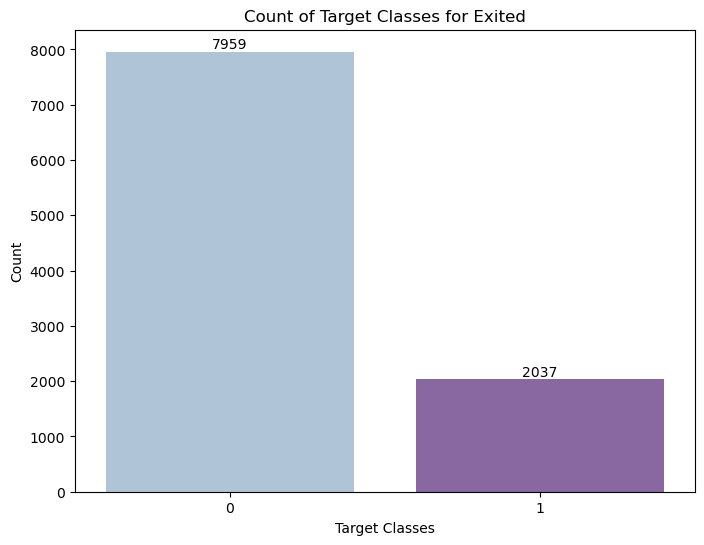

<Figure size 640x480 with 0 Axes>

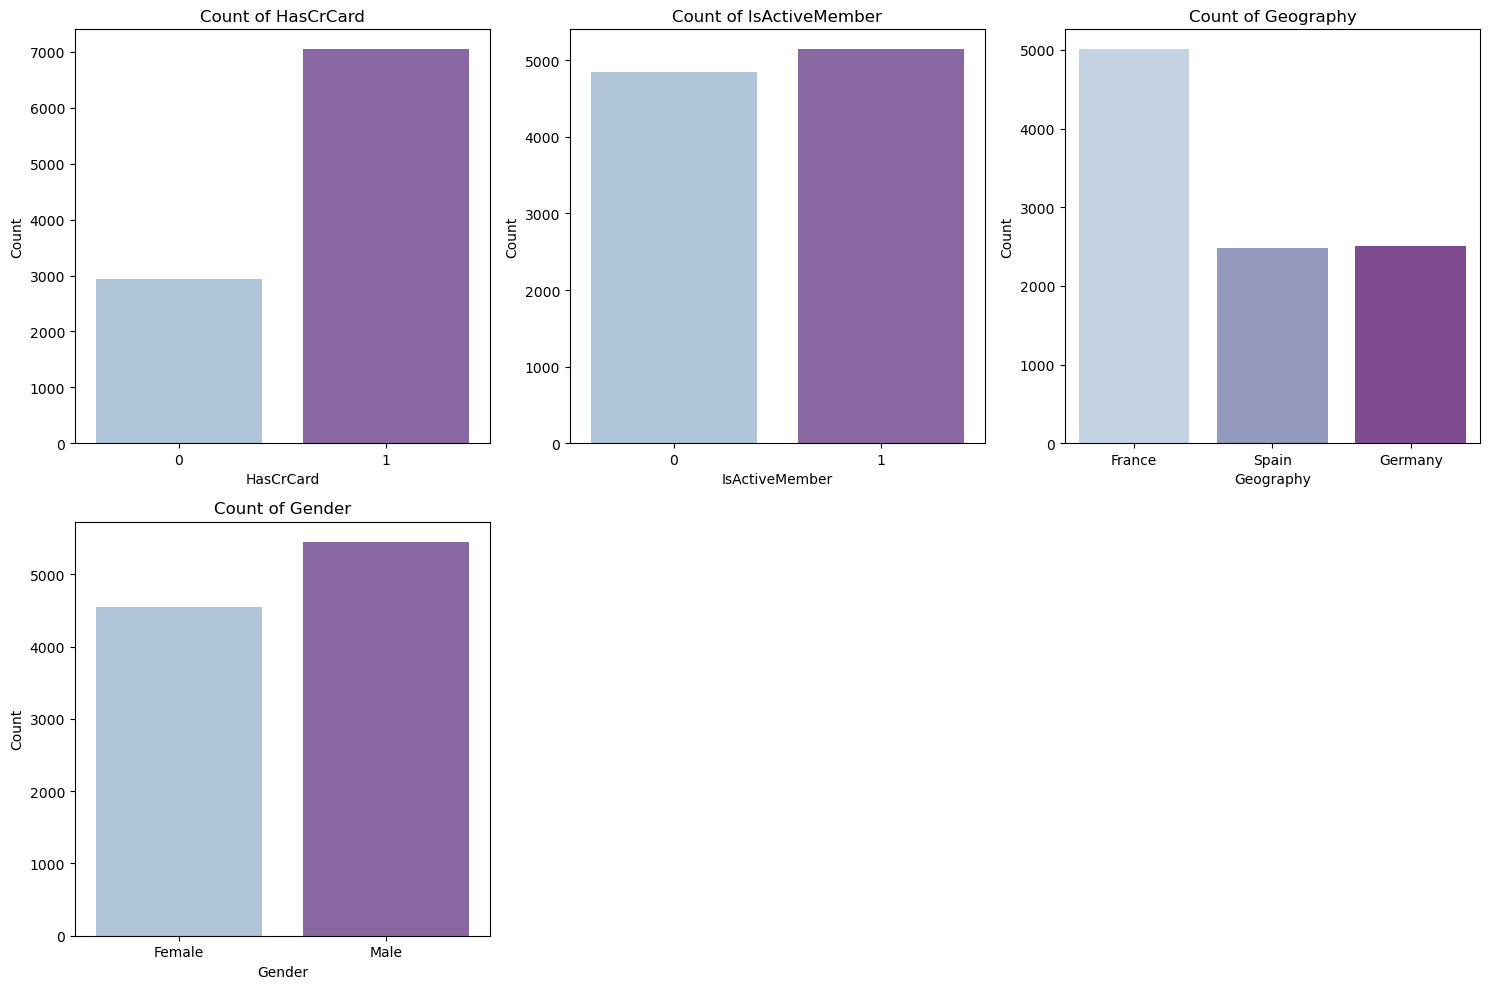

<Figure size 640x480 with 0 Axes>

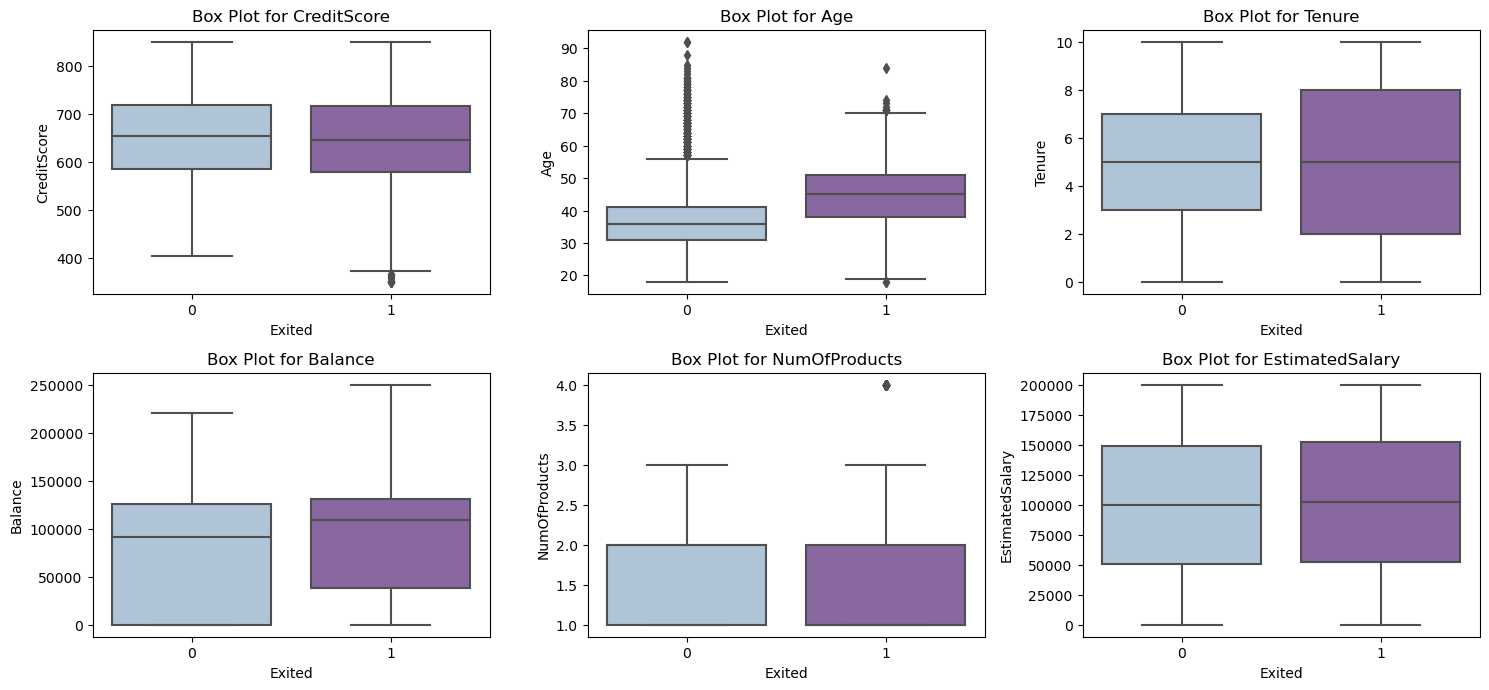

<Figure size 640x480 with 0 Axes>

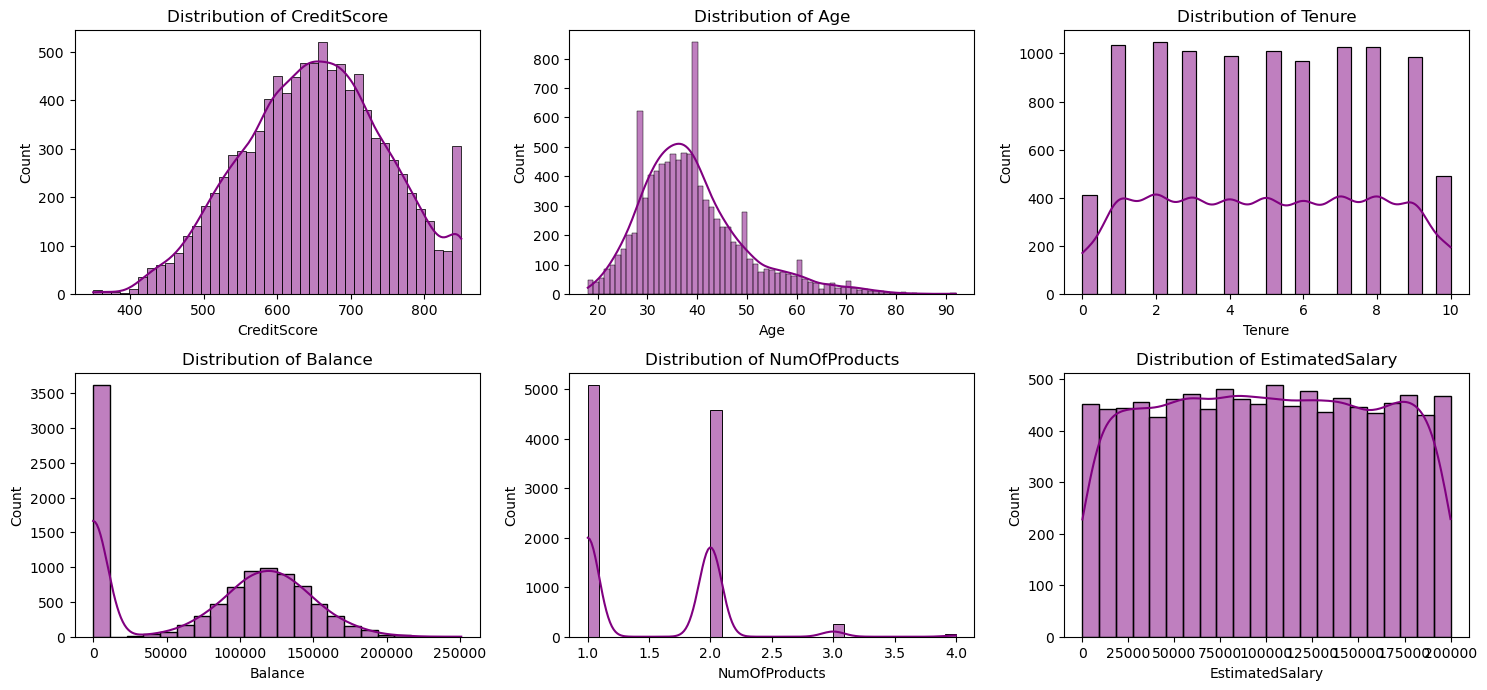

<Figure size 640x480 with 0 Axes>

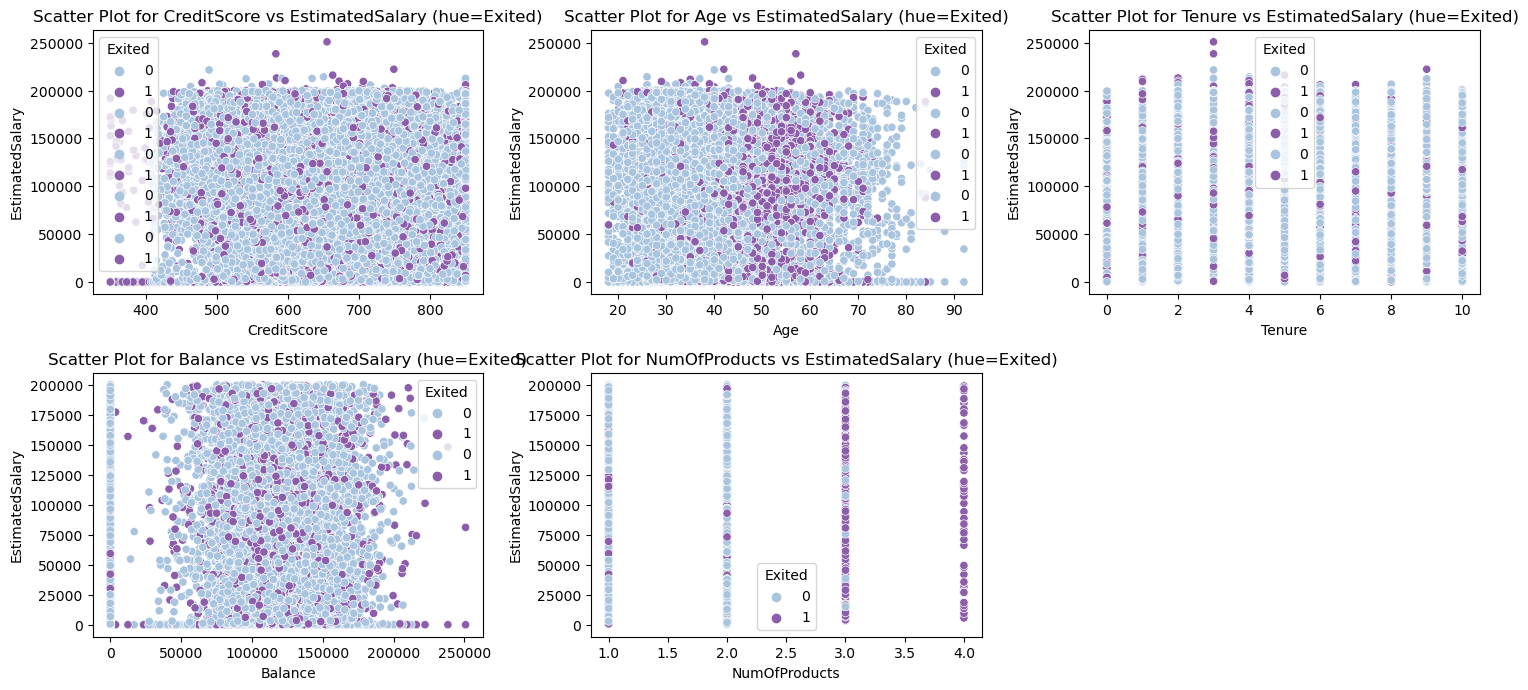



Detecting outliers in dataset...
---------------------------------------------------------------------------
Outliers detected in each numerical column:
CreditScore: 16 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
EstimatedSalary: 0 outliers
Total outliers detected: 433
Percentage of dataset rows containing outliers:  4.331732693077231 %


Do you want to remove the outliers? (Yes/No): Yes
Outliers removed.


Standardization of Numerical Variables
---------------------------------------------------------------------------
Do you want to standardize any numerical columns? (Yes/No): Yes
Numerical Feature Names:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Enter the numerical columns you want to standardize (comma-separated): CreditScore, Age, Balance, EstimatedSalary


Categorical Encoding
---------------------------------------------------------------------------
   CreditScore Geography  Gender       Ag

<Figure size 1200x500 with 0 Axes>

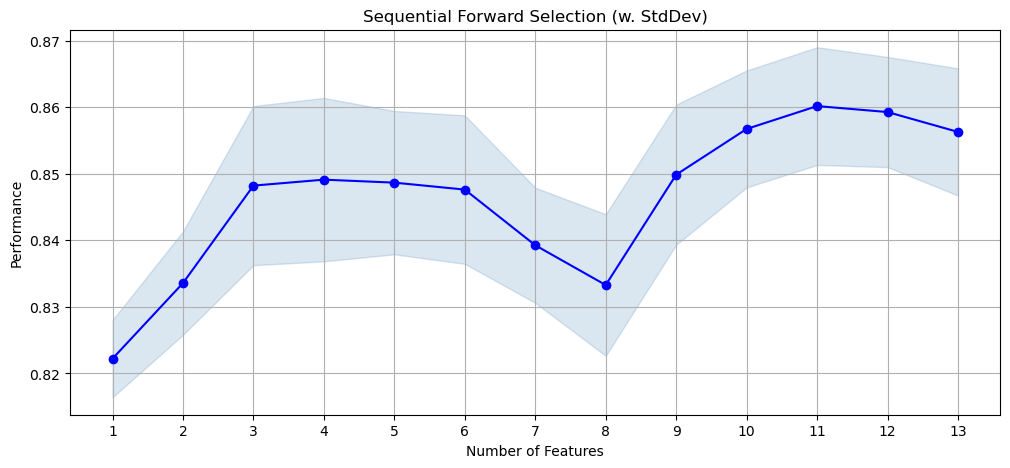

Enter the number of features to select: 11


In [23]:
churn, churn_cols = master() # passing dataset through pipeline

#### Interpretation:

The histogram plotted for the target variable, Exited, has two classes, 0, 7959 customers - for those who have not exited and 1 for those who have exited (2037). 




In [27]:
print(churn_cols) # printing feature selected variable names

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


In [28]:
churn.head() # viewing preprocessed dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.330043,0.485817,2,-1.224405,1,1,1,0.021581,1,1,0,0,1,0
1,-0.444598,0.371950,1,0.118334,1,0,1,0.216170,0,0,0,1,1,0
2,-1.548486,0.485817,8,1.333623,3,1,0,0.240316,1,1,0,0,1,0
3,0.503080,0.144217,1,-1.224405,2,0,0,-0.109185,0,1,0,0,1,0
4,-0.059278,0.713550,8,0.598149,2,1,0,0.863095,1,0,0,1,0,1


In [29]:
final_churn_cols = churn_cols
final_churn_cols.append("Exited")
print(final_churn_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']


In [30]:
churn_df = churn[final_churn_cols] # creating dataframe with selected features

In [31]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,-0.330043,0.485817,2,-1.224405,1,1,1,0.021581,1,0,0,1
1,-0.444598,0.371950,1,0.118334,1,0,1,0.216170,0,0,1,0
2,-1.548486,0.485817,8,1.333623,3,1,0,0.240316,1,0,0,1
3,0.503080,0.144217,1,-1.224405,2,0,0,-0.109185,1,0,0,0
4,-0.059278,0.713550,8,0.598149,2,1,0,0.863095,0,0,1,1


In [33]:
churn_df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
9558,1.252891,0.144217,5,-1.224405,2,1,0,-0.066699,1,0,0,0
9559,-1.402689,-0.311249,10,-0.305250,1,1,1,0.027680,1,0,0,0
9560,0.607220,-0.197383,7,-1.224405,1,0,1,-1.008644,1,0,0,1
9561,1.263305,0.485817,3,-0.021575,2,1,0,-0.125493,0,1,0,1
9562,1.471586,-1.108316,4,0.860696,1,1,0,-1.076351,1,0,0,0


In [32]:
churn_df.shape

(9563, 12)

In [34]:
churn_df.to_csv('preprocessed_churn_df.csv', index = False) # exporting dataframe as a CSV file